In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import networkx as nx
from matplotlib import cm

In [2]:
# matplotlib.font_manager.fontManager.ttflist

In [3]:
# from matplotlib import font_manager
# sorted(font_manager.get_font_names())

In [4]:
# plt.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.family'] = "Liberation Serif"
plt.rcParams['font.size'] = 12

## load data first 256 test

In [10]:
data = np.load('testviz/testviz_data.npy')
labels = np.load('testviz/testviz_labels.npy')
mask = np.load('testviz/testviz_mask.npy')
label_flat =  np.load('testviz/testviz_label_flat.npy')

In [6]:
data.shape, labels.shape,mask.shape, label_flat.shape

((256, 2016, 231), (256, 2016), (256, 2016), (60204,))

## load layer represenations and adjacency matrix

In [5]:
featuretime_layer_1 = np.load('featuretime_layer_1.npy')
featuretime_layer_2 = np.load('featuretime_layer_2.npy')

wadj_layer_1 = np.load('wadj_layer_1.npy')
wadj_layer_2 = np.load('wadj_layer_2.npy')

In [6]:
mean_feature_time_maps_l1 = np.mean(featuretime_layer_1, axis=1)
mean_feature_time_maps_l2 = np.mean(featuretime_layer_2, axis=1)

In [7]:
print(featuretime_layer_1.shape, featuretime_layer_2.shape, mean_feature_time_maps_l1.shape, mean_feature_time_maps_l2.shape, wadj_layer_1.shape, wadj_layer_2.shape)

(64, 64, 231, 2016) (64, 64, 231, 2016) (64, 231, 2016) (64, 231, 2016) (64, 32, 231, 231) (64, 32, 231, 231)


In [22]:
pid = 51#51 ##55 works correctly, 44 works correctly, 51 is okay, 18- small rf

In [23]:
dtest_x = data[pid].T
## plot labels
dtest_y_2d = np.expand_dims(labels[pid], axis=0)

In [24]:
dtest_x

array([[ 0.0000000e+00,  1.2400794e-04,  2.4801589e-04, ...,
         2.4962798e-01,  2.4975199e-01,  2.4987599e-01],
       [-1.0530308e+00, -6.1708909e-01, -5.5481172e-01, ...,
        -1.1886993e-01,  1.3023965e-01,  5.6848628e-03],
       [-1.6086287e+00, -1.1004587e+00, -1.0496417e+00, ...,
        -3.8902071e-01, -1.3493571e-01,  1.7515300e-02],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [25]:
mask_x = mask[pid]

In [26]:
mask_x[:300]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [27]:
def visualize_with_corrected_initial_mask(data, ax, shift=144):
    ax.axis('off')  # Hide axis for clarity

    # Initialize all positions with gray, indicating inactive or unknown state
    shifted_colors = ['gray'] * len(data)

    # Correct the initial mask: first 'shift' positions should be black
    for i in range(shift):
        shifted_colors[i] = 'black'

    # Apply shift for '1's and mark them green, within bounds
    for i, val in enumerate(data):
        if val == 1 and i + shift < len(data):
            shifted_colors[i + shift] = 'green'

    # Overlay the original mask (0 values) onto the shifted representation, including initial black mask
    for i, val in enumerate(data):
        if val == 0:
            shifted_colors[i] = 'black'  # Preserve original mask positions with black

    # Visualize the result
    for i, color in enumerate(shifted_colors):
        ax.axvspan(i, i + 1, color=color, alpha=1.0)

    # Adjust limits to match the data length
    ax.set_xlim(0, len(data))
    legend_elements = [Patch(facecolor='green', label='Yes'),
                       Patch(facecolor='gray', label='No'),
                       Patch(facecolor='black', label='Mask')]
    # ax.legend(handles=legend_elements, loc='upper right', title="Respiratory Failure State",
    ax.legend(handles=legend_elements, loc='upper right', title="RF State",
             bbox_to_anchor=(1.12, 1.75),
            # ncol=3
             )

In [28]:
# fig, axs = plt.subplots(3, 1, figsize=(12, 4), gridspec_kw={'height_ratios': [1,0.15,3]}, sharex=True,layout='constrained')

# color_map = {-1: '#00FFFF', 0: 'black', 1: '#FF7F50'}
# colors = np.vectorize(color_map.get)(dtest_y_2d)
# # Bar plot adjusted to match the width of the plot below
# for i, color in enumerate(colors.flatten()):
#     axs[0].plot([i, i+1], [0, 0], color=color, linewidth=10)
# axs[0].axis('off')
# legend_labels = {-1: "Negative", 0: "Mask", 1: "Positive"}
# legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
# # Adjusting xlim to ensure the top bar matches the width of the plot below
# axs[0].set_xlim(0, 2016)
# axs[0].legend(handles=legend_handles, loc='center right', title="Prediction Label",
#               bbox_to_anchor=(1.15, 0.75),
#               # ncol=len(legend_handles)
#              )
# #########################################################################

# # visualize_adjusted_shift_and_mask(data=dtest_y_2d[0].tolist(), ax=axs[1])
# visualize_with_corrected_initial_mask(data=dtest_y_2d[0].tolist(), ax=axs[1])
# # pos1 = axs[1].get_position()  # gets the position of the current subplot
# # pos2 = [pos1.x0, pos1.y0 - 0.1,  pos1.width, pos1.height]  # Lower the subplot a bit
# # axs[1].set_position(pos2)  # set a new position
# ########################################################################
# # Feature-Time Visualization adjusted
# im = axs[2].imshow(dtest_x, aspect='auto', cmap='RdBu_r',vmin=-1, vmax=1)
# fig.colorbar(im, ax=axs[2], 
#              location = 'right',
#              orientation='vertical',
#              # fraction=0.9,
#              # aspect=2,
#              pad=-0.06,
#              # bbox_to_anchor=(0.1,0,1,1),
#              # shrink=0.9,
#              # anchor=(0.5, 0.5)
#             )

# steps = [63, 126, 189, 252, 315, 378, 441, 504, 567, 630, 693, 756, 819, 882, 945, 1008, 1071, 1134, 1197, 1260, 1323, 1386, 1449, 1512, 1575, \
#          1638, 1701, 1764, 1827, 1890, 1953]

# # Add vertical lines at specific steps
# for step in steps:
#     axs[2].axvline(x=step, color='white', linestyle='-', linewidth=2)
    
# axs[2].text(-140, -10, 'Windows ', fontsize=10, color='black')
# # Example range of numbers
# numbers = range(1, 33)
# x_positions = range(30, 2016,63)
# y_position = -10

# # Loop through each number and its respective x position to plot the text
# for number, x in zip(numbers, x_positions):
#     axs[2].text(x, y_position, str(number), ha='center',fontsize=10)
    
# axs[2].set_xlabel('Timesteps')
# axs[2].set_ylabel('Features')
# # plt.tight_layout()
# # plt.savefig('03_nwtworks_05.png', dpi=1200, bbox_inches='tight')
# # plt.subplots_adjust(hspace=0.2)
# plt.show()

In [29]:
dtest_x_l1 = mean_feature_time_maps_l1[pid]
dtest_y_2d = np.expand_dims(labels[pid], axis=0)
# dtest_y_2d
mask_bool = dtest_y_2d != 0
masked_data_l1 = np.where(mask_bool, dtest_x_l1, 0)

In [30]:
# # dtest_x = mean_feature_time_maps_l1[pid]
# ## plot labels


# fig, axs = plt.subplots(3, 1, figsize=(12, 4), gridspec_kw={'height_ratios': [1,0.15,3]}, sharex=True,layout='constrained')

# color_map = {-1: '#00FFFF', 0: 'black', 1: '#FF7F50'}
# colors = np.vectorize(color_map.get)(dtest_y_2d)
# # Bar plot adjusted to match the width of the plot below
# for i, color in enumerate(colors.flatten()):
#     axs[0].plot([i, i+1], [0, 0], color=color, linewidth=10)
# axs[0].axis('off')
# legend_labels = {-1: "Negative", 0: "Mask", 1: "Positive"}
# legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
# # Adjusting xlim to ensure the top bar matches the width of the plot below
# axs[0].set_xlim(0, 2016)
# axs[0].legend(handles=legend_handles, loc='center right', title="Prediction Label",
#               bbox_to_anchor=(1.15, 0.75),
#               # ncol=len(legend_handles)
#              )
# #########################################################################
# visualize_with_corrected_initial_mask(data=dtest_y_2d[0].tolist(), ax=axs[1])
# # visualize_adjusted_shift_and_mask(data=dtest_y_2d[0].tolist(), ax=axs[1])
# # pos1 = axs[1].get_position()  # gets the position of the current subplot
# # pos2 = [pos1.x0, pos1.y0 - 0.1,  pos1.width, pos1.height]  # Lower the subplot a bit
# # axs[1].set_position(pos2)  # set a new position
# ########################################################################
# # Feature-Time Visualization adjusted
# im = axs[2].imshow(masked_data_l1, aspect='auto', cmap='RdBu_r',vmin=-0.3, vmax=0.3)
# fig.colorbar(im, ax=axs[2], 
#              location = 'right',
#              orientation='vertical',
#              # fraction=0.9,
#              # aspect=2,
#              pad=-0.06,
#              # bbox_to_anchor=(0.1,0,1,1),
#              # shrink=0.9,
#              # anchor=(0.5, 0.5)
#             )

# steps = [63, 126, 189, 252, 315, 378, 441, 504, 567, 630, 693, 756, 819, 882, 945, 1008, 1071, 1134, 1197, 1260, 1323, 1386, 1449, 1512, 1575, \
#          1638, 1701, 1764, 1827, 1890, 1953]

# # Add vertical lines at specific steps
# for step in steps:
#     axs[2].axvline(x=step, color='white', linestyle='-', linewidth=2)
    
# axs[2].text(-140, -10, 'Windows ', fontsize=10, color='black')
# # Example range of numbers
# numbers = range(1, 33)
# x_positions = range(30, 2016,63)
# y_position = -10

# # Loop through each number and its respective x position to plot the text
# for number, x in zip(numbers, x_positions):
#     axs[2].text(x, y_position, str(number), ha='center',fontsize=10)
    
# axs[2].set_xlabel('Timesteps')
# axs[2].set_ylabel('Features')
# # plt.tight_layout()
# # plt.savefig('03_nwtworks_05.png', dpi=1200, bbox_inches='tight')
# # plt.subplots_adjust(hspace=0.2)
# plt.show()

In [31]:
dtest_x_l2 = mean_feature_time_maps_l2[pid]
dtest_y_2d = np.expand_dims(labels[pid], axis=0)
# dtest_y_2d
mask_bool = dtest_y_2d != 0
masked_data_l2 = np.where(mask_bool, dtest_x_l2, 0)

In [32]:
def normalize_time_series_featurewise(data):
    data = np.array(data)
    
    # Calculate the minimum and maximum along each feature
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    
    # Apply the normalization formula feature-wise
    normalized_data = 2 * ((data - min_val) / (max_val - min_val)) - 1
    
    return normalized_data


In [33]:
# fig, axs = plt.subplots(3, 1, figsize=(12, 4), gridspec_kw={'height_ratios': [1,0.15,3]}, sharex=True,layout='constrained')

# color_map = {-1: '#00FFFF', 0: 'black', 1: '#FF7F50'}
# colors = np.vectorize(color_map.get)(dtest_y_2d)
# # Bar plot adjusted to match the width of the plot below
# for i, color in enumerate(colors.flatten()):
#     axs[0].plot([i, i+1], [0, 0], color=color, linewidth=10)
# axs[0].axis('off')
# legend_labels = {-1: "Negative", 0: "Mask", 1: "Positive"}
# legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
# # Adjusting xlim to ensure the top bar matches the width of the plot below
# axs[0].set_xlim(0, 2016)
# axs[0].legend(handles=legend_handles, loc='center right', title="Prediction Label",
#               bbox_to_anchor=(1.15, 0.75),
#               # ncol=len(legend_handles)
#              )
# #########################################################################
# visualize_with_corrected_initial_mask(data=dtest_y_2d[0].tolist(), ax=axs[1])
# # visualize_adjusted_shift_and_mask(data=dtest_y_2d[0].tolist(), ax=axs[1])
# # pos1 = axs[1].get_position()  # gets the position of the current subplot
# # pos2 = [pos1.x0, pos1.y0 - 0.1,  pos1.width, pos1.height]  # Lower the subplot a bit
# # axs[1].set_position(pos2)  # set a new position
# ########################################################################
# # Feature-Time Visualization adjusted
# im = axs[2].imshow(masked_data_l2, aspect='auto', cmap='RdBu_r',vmin=-10, vmax=10)
# fig.colorbar(im, ax=axs[2], 
#              location = 'right',
#              orientation='vertical',
#              # fraction=0.9,
#              # aspect=2,
#              pad=-0.06,
#              # bbox_to_anchor=(0.1,0,1,1),
#              # shrink=0.9,
#              # anchor=(0.5, 0.5)
#             )

# steps = [63, 126, 189, 252, 315, 378, 441, 504, 567, 630, 693, 756, 819, 882, 945, 1008, 1071, 1134, 1197, 1260, 1323, 1386, 1449, 1512, 1575, \
#          1638, 1701, 1764, 1827, 1890, 1953]

# # Add vertical lines at specific steps
# for step in steps:
#     axs[2].axvline(x=step, color='white', linestyle='-', linewidth=2)
    
# axs[2].text(-140, -10, 'Windows ', fontsize=10, color='black')
# # Example range of numbers
# numbers = range(1, 33)
# x_positions = range(30, 2016,63)
# y_position = -10

# # Loop through each number and its respective x position to plot the text
# for number, x in zip(numbers, x_positions):
#     axs[2].text(x, y_position, str(number), ha='center',fontsize=10)
    
# axs[2].set_xlabel('Timesteps')
# axs[2].set_ylabel('Features')
# # plt.tight_layout()
# # plt.savefig('03_nwtworks_05.png', dpi=1200, bbox_inches='tight')
# # plt.subplots_adjust(hspace=0.2)
# plt.show()

# one combined plot

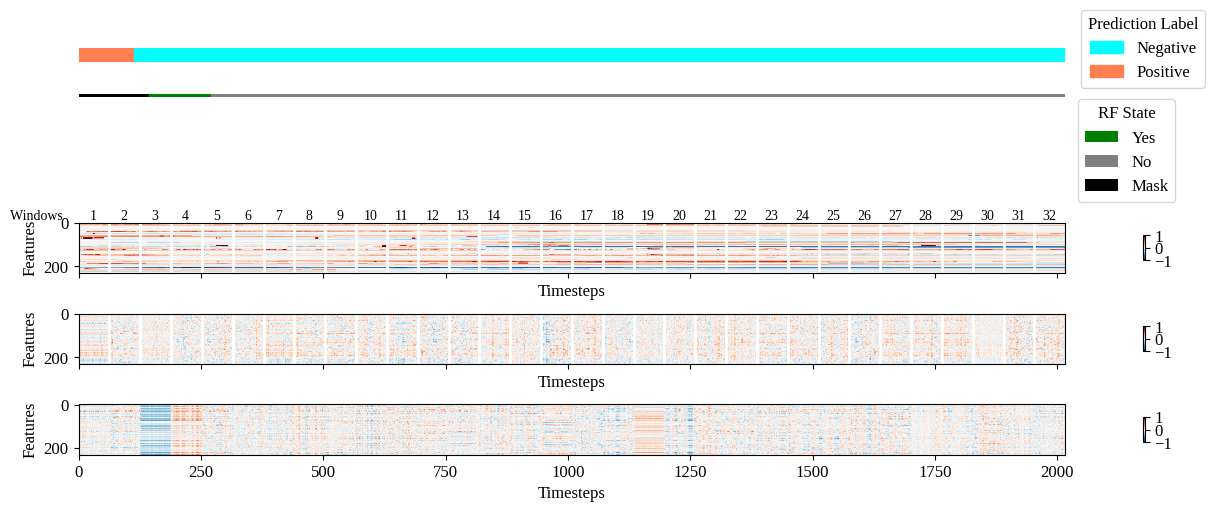

In [34]:
fig, axs = plt.subplots(5, 1, figsize=(12, 5), gridspec_kw={'height_ratios': [1,0.15,2,2,2]}, sharex=True,layout='constrained')

if pid == 51:
    color_map = {-1: '#00FFFF', 1: '#FF7F50'}
else:
    color_map = {-1: '#00FFFF', 0: 'black', 1: '#FF7F50'}
colors = np.vectorize(color_map.get)(dtest_y_2d)
# Bar plot adjusted to match the width of the plot below
for i, color in enumerate(colors.flatten()):
    axs[0].plot([i, i+1], [0, 0], color=color, linewidth=10)
axs[0].axis('off')
legend_labels = {-1: "Negative", 0: "Mask", 1: "Positive"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
# Adjusting xlim to ensure the top bar matches the width of the plot below
axs[0].set_xlim(0, 2016)
axs[0].legend(handles=legend_handles, loc='center right', title="Prediction Label",
              bbox_to_anchor=(1.15, 0.75),
              # ncol=len(legend_handles)
             )
#########################################################################
visualize_with_corrected_initial_mask(data=dtest_y_2d[0].tolist(), ax=axs[1])
# visualize_adjusted_shift_and_mask(data=dtest_y_2d[0].tolist(), ax=axs[1])
# pos1 = axs[1].get_position()  # gets the position of the current subplot
# pos2 = [pos1.x0, pos1.y0 - 0.1,  pos1.width, pos1.height]  # Lower the subplot a bit
# axs[1].set_position(pos2)  # set a new position
########################################################################



# Feature-Time Visualization adjusted ##################################################### Original Features
im = axs[2].imshow(dtest_x, aspect='auto', cmap='RdBu_r',vmin=-1, vmax=1)
fig.colorbar(im, ax=axs[2], 
             location = 'right',
             orientation='vertical',
             # fraction=0.9,
             # aspect=2,
             pad=-0.06,
             # bbox_to_anchor=(0.1,0,1,1),
             shrink=0.5,
             # anchor=(0.5, 0.5)
            )

steps = [63, 126, 189, 252, 315, 378, 441, 504, 567, 630, 693, 756, 819, 882, 945, 1008, 1071, 1134, 1197, 1260, 1323, 1386, 1449, 1512, 1575, 1638, 1701, 1764, 1827, 1890, 1953]

# Add vertical lines at specific steps
for step in steps:
    axs[2].axvline(x=step, color='white', linestyle='-', linewidth=2)
    
axs[2].text(-140, -15, 'Windows ', fontsize=10, color='black')
# Example range of numbers
numbers = range(1, 33)
x_positions = range(30, 2016,63)
y_position = -15

# Loop through each number and its respective x position to plot the text
for number, x in zip(numbers, x_positions):
    axs[2].text(x, y_position, str(number), ha='center',fontsize=10)
    
axs[2].set_xlabel('Timesteps')
axs[2].set_ylabel('Features')


# Feature-Time Visualization adjusted ########################################################### LAYER 1

im = axs[3].imshow(normalize_time_series_featurewise(masked_data_l1), aspect='auto', cmap='RdBu_r',
                   # vmin=-0.1, vmax=0.1
                  )
# im = axs[3].imshow(masked_data_l1, aspect='auto', cmap='RdBu_r',vmin=-0.1, vmax=0.1)
fig.colorbar(im, ax=axs[3], 
             location = 'right',
             orientation='vertical',
             # fraction=0.9,
             # aspect=2,
             pad=-0.06,
             # bbox_to_anchor=(0.1,0,1,1),
             shrink=0.5,
             # anchor=(0.5, 0.5)
            )

# Add vertical lines at specific steps
for step in steps:
    axs[3].axvline(x=step, color='white', linestyle='-', linewidth=2)
    
# axs[3].text(-140, -15, 'Windows ', fontsize=10, color='black')
# # Example range of numbers
# numbers = range(1, 33)
# x_positions = range(30, 2016,63)
# y_position = -15

# # Loop through each number and its respective x position to plot the text
# for number, x in zip(numbers, x_positions):
#     axs[3].text(x, y_position, str(number), ha='center',fontsize=10)
    
axs[3].set_xlabel('Timesteps')
axs[3].set_ylabel('Features')


# Feature-Time Visualization adjusted ########################################################### LAYER 2
im = axs[4].imshow(normalize_time_series_featurewise(masked_data_l2), aspect='auto', cmap='RdBu_r',
                   # vmin=-10, vmax=10
                  )
# im = axs[4].imshow(masked_data_l2, aspect='auto', cmap='RdBu_r',vmin=-10, vmax=10)
fig.colorbar(im, ax=axs[4], 
             location = 'right',
             orientation='vertical',
             # fraction=0.9,
             # aspect=2,
             pad=-0.06,
             # bbox_to_anchor=(0.1,0,1,1),
             shrink=0.5,
             # anchor=(0.5, 0.5)
            )

# # Add vertical lines at specific steps
# for step in steps:
#     axs[4].axvline(x=step, color='white', linestyle='-', linewidth=2)
    
# axs[4].text(-140, -15, 'Windows ', fontsize=10, color='black')
# # Example range of numbers
# numbers = range(1, 33)
# x_positions = range(30, 2016,63)
# y_position = -15

# # Loop through each number and its respective x position to plot the text
# for number, x in zip(numbers, x_positions):
#     axs[4].text(x, y_position, str(number), ha='center',fontsize=10)
    
axs[4].set_xlabel('Timesteps')
axs[4].set_ylabel('Features')
# plt.tight_layout()
# plt.savefig('images/Fig04.png', dpi=1200, bbox_inches='tight')
# plt.subplots_adjust(hspace=0.2)
plt.show()

In [35]:
def visualize_with_corrected_initial_mask_v2(data, ax, shift=144):
    ax.axis('off')  # Hide axis for clarity

    # Initialize all positions with gray, indicating inactive or unknown state
    shifted_colors = ['gray'] * len(data)

    # Correct the initial mask: first 'shift' positions should be black
    for i in range(shift):
        shifted_colors[i] = 'black'

    # Apply shift for '1's and mark them green, within bounds
    for i, val in enumerate(data):
        if val == 1 and i + shift < len(data):
            shifted_colors[i + shift] = 'green'

    # Overlay the original mask (0 values) onto the shifted representation, including initial black mask
    for i, val in enumerate(data):
        if val == 0:
            shifted_colors[i] = 'black'  # Preserve original mask positions with black

    # Visualize the result
    for i, color in enumerate(shifted_colors):
        ax.axvspan(i, i + 1, color=color, alpha=1.0)

    # Adjust limits to match the data length
    ax.set_xlim(0, len(data))
    legend_elements = [Patch(facecolor='green', label='Yes'),
                       Patch(facecolor='gray', label='No'),
                       Patch(facecolor='black', label='Mask')]
    # ax.legend(handles=legend_elements, loc='upper right', title="Respiratory Failure State",
    ax.legend(handles=legend_elements, loc='center', title="",
             bbox_to_anchor=(0.5, -0.75),
             frameon=False,
            ncol=3,
            fontsize=12
             )

In [38]:
dtest_y_2d.shape, masked_data_l2.shape

((1, 2016), (231, 2016))

In [39]:
np.save('github/label.npy', dtest_y_2d)
np.save('github/tgp2_out.npy',masked_data_l2)

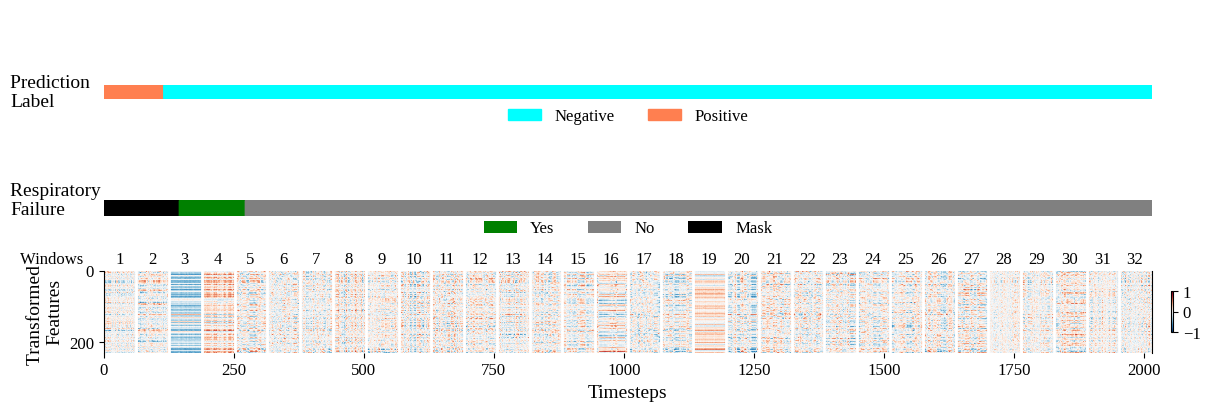

In [36]:
fig, axs = plt.subplots(3, 1, figsize=(12, 4), gridspec_kw={'height_ratios': [1,0.1,0.5]}, sharex=True,
                        layout='constrained'
                       )

if pid == 51:
    color_map = {-1: '#00FFFF', 1: '#FF7F50'}
else:
    color_map = {-1: '#00FFFF', 0: 'black', 1: '#FF7F50'}
colors = np.vectorize(color_map.get)(dtest_y_2d)
# Bar plot adjusted to match the width of the plot below
for i, color in enumerate(colors.flatten()):
    axs[0].plot([i, i+1], [0, 0], color=color, linewidth=10)
axs[0].axis('off')
legend_labels = {-1: "Negative", 0: "Mask", 1: "Positive"}
legend_handles = [Patch(color=color, label=legend_labels[label]) for label, color in color_map.items()]
# Adjusting xlim to ensure the top bar matches the width of the plot below
axs[0].set_xlim(0, 2016)
axs[0].legend(handles=legend_handles, loc='center', title="",
              # bbox_to_anchor=(1.15, 0.75),
              bbox_to_anchor=(0.5, 0.35),
              ncol=len(legend_handles),
              fontsize=12,
              frameon=False,
             )
axs[0].text(-180, -0.01, 'Prediction \nLabel', fontsize=14, color='black')
#########################################################################
visualize_with_corrected_initial_mask_v2(data=dtest_y_2d[0].tolist(), ax=axs[1])
axs[1].text(-180, 0.1, 'Respiratory \nFailure', fontsize=14, color='black')
# visualize_adjusted_shift_and_mask(data=dtest_y_2d[0].tolist(), ax=axs[1])
# pos1 = axs[1].get_position()  # gets the position of the current subplot
# pos2 = [pos1.x0, pos1.y0 - 0.1,  pos1.width, pos1.height]  # Lower the subplot a bit
# axs[1].set_position(pos2)  # set a new position
########################################################################

# Feature-Time Visualization adjusted ########################################################### LAYER 2
im = axs[2].imshow(normalize_time_series_featurewise(masked_data_l2), aspect='auto', cmap='RdBu_r',
                   # vmin=-10, vmax=10
                  )
# im = axs[2].imshow(masked_data_l2, aspect='auto', cmap='RdBu_r',vmin=-10, vmax=10)
fig.colorbar(im, ax=axs[2], 
             location = 'right',
             orientation='vertical',
             # fraction=0.9,
             # aspect=2,
             pad=0.01,
             # bbox_to_anchor=(0.1,0,1,1),
             shrink=0.5,
             # anchor=(0.5, 0.5)
            )

# Add vertical lines at specific steps
for step in steps:
    axs[2].axvline(x=step, color='white', linestyle='-', linewidth=2)
    
axs[2].text(-160, -20, 'Windows ', fontsize=12, color='black')
# Example range of numbers
numbers = range(1, 33)
x_positions = range(30, 2016,63)
y_position = -20

# Loop through each number and its respective x position to plot the text
for number, x in zip(numbers, x_positions):
    axs[2].text(x, y_position, str(number), ha='center',fontsize=12)
    
axs[2].set_xlabel('Timesteps',fontsize=14)
axs[2].set_ylabel('Transformed \nFeatures',fontsize=14)
axs[2].spines['top'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
# plt.tight_layout()
plt.savefig('images/Fig04_short.png', dpi=1200, bbox_inches='tight')
# plt.subplots_adjust(hspace=0.2)
# plt.subplots_adjust(top=0.95) 
plt.show()

In [ ]:
wadj_layer_1_pid

In [40]:
varname  = pd.read_csv('varname_clean.csv')
var_names = varname['cleanshortname'].values.tolist()

## now adjacency matrix

In [41]:
## pid specific wadj
wadj_layer_1_pid = wadj_layer_1[pid]
wadj_layer_2_pid = wadj_layer_2[pid]

In [44]:
np.save('wadj_layer_2.npy',wadj_layer_2_pid)

## convert these matrices to nice looking graphs

In [34]:
def network_plotter(timeslot,layer,var_names,threshold):
    
    
    if layer ==1:
        adj_matrix = wadj_layer_1_pid[timeslot]
    elif layer==2:
        adj_matrix = wadj_layer_2_pid[timeslot]
        
    normalized_matrix = (adj_matrix - adj_matrix.min()) / (adj_matrix.max() - adj_matrix.min())
    # Create a graph from the adjacency matrix
    G = nx.Graph()
    node_names = var_names
    # Add weighted edges based on the adjacency matrix
    for i in range(len(normalized_matrix)):
        for j in range(i+1, len(normalized_matrix)):
            weight = normalized_matrix[i, j]
            if weight > threshold:  # Check if weight is above the threshold
                G.add_edge(i, j, weight=weight)

    # Now extract the weights and normalize them
    edge_weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
    weights_normalized = (edge_weights - edge_weights.min()) / (edge_weights.max() - edge_weights.min())
    if G.has_node(106):
        G.remove_node(106)
    # Remove isolated nodes (optional)
    G.remove_nodes_from(list(nx.isolates(G)))

    nodes_with_some_neighbor = [node for node, degree in dict(G.degree()).items() if degree in [1,2,3]]
    # Then, remove these nodes from the graph
    G.remove_nodes_from(nodes_with_some_neighbor)
    G.remove_nodes_from(list(nx.isolates(G)))
    # Adjust the node_names dictionary to only include nodes present in the graph after filtering
    filtered_node_names = {node: node_names[node] for node in G.nodes()}

    # Create a color map to map the normalized weights to colors
    cmap = cm.Blues  # You can choose a color map that you prefer

    # Create a list of colors for each edge
    edge_colors = [cmap(w) for w in weights_normalized]


    # Plot the graph
    plt.figure(figsize=(17, 12))  # Increase figure size for better clarity
    # pos = nx.spring_layout(G)  # Use spring layout for node positions
    pos = nx.kamada_kawai_layout(G)  # Use spring layout for node positions

    d = dict(G.degree)
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='k', node_size=[d[k]*200 for k in d], alpha=0.05)

    # Draw edges with colors based on weights
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

    # If you want to add a color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=edge_weights.min(), vmax=edge_weights.max()))
    sm.set_array([])
    plt.colorbar(sm, label='edge weight',shrink=0.1,)

    # # Draw labels
    # labels = {i: f"Node {i+1}" for i in range(len(normalized_matrix))}  # Replace with your actual labels
    nx.draw_networkx_labels(G, pos, labels=filtered_node_names, font_size=24,
                            # font_weight='bold',
                            font_family="Liberation Serif",
                            font_color='k')

    plt.axis('off')
    plt.savefig(f'images/Fig04b_{pid}_{timeslot}_{layer}.png', dpi=600, bbox_inches='tight')
    plt.show()

/tmp/ipykernel_26190/3121054159.py:57: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='edge weight',shrink=0.1,)


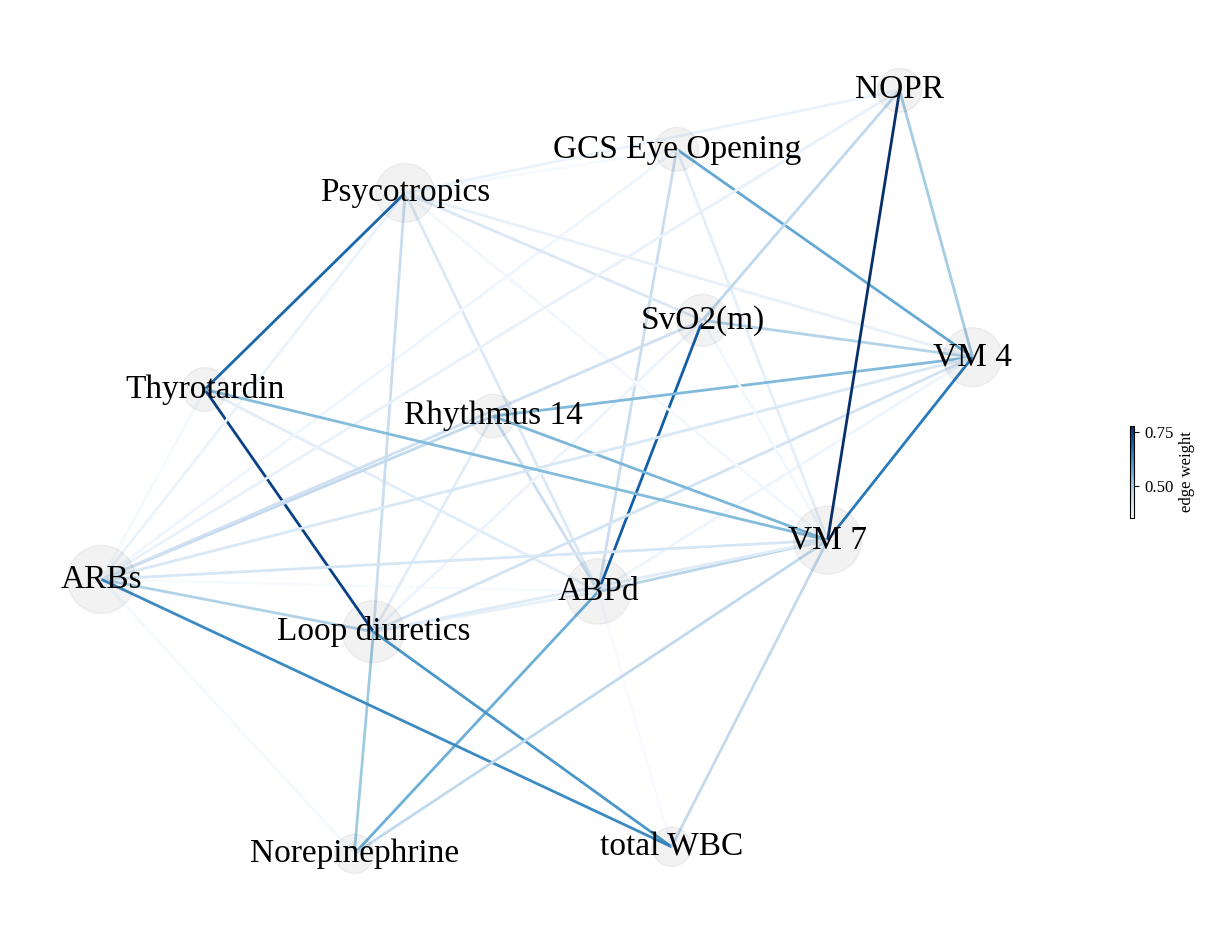

In [35]:
network_plotter(timeslot=2,layer=2,var_names=var_names,threshold=0.35)

/tmp/ipykernel_26190/3121054159.py:57: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='edge weight',shrink=0.1,)


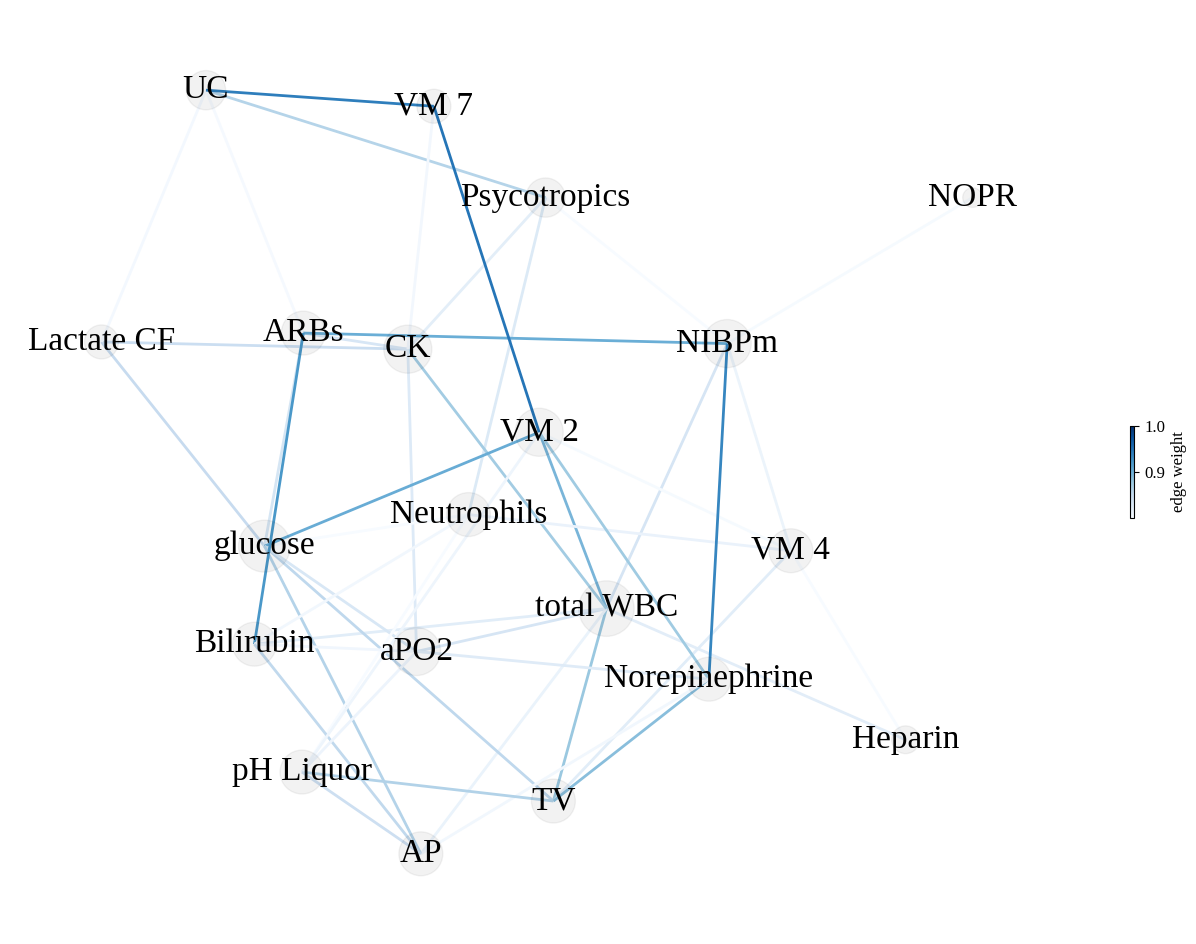

In [36]:
network_plotter(timeslot=3,layer=2,var_names=var_names,threshold=0.8)

In [272]:
# network_plotter(timeslot=3,layer=2,var_names=var_names,threshold=0.845)

In [273]:
# network_plotter(timeslot=13,layer=1,var_names=var_names,threshold=0.63)

In [274]:
# network_plotter(timeslot=28,layer=2,var_names=var_names,threshold=0.77)

In [275]:
# network_plotter(timeslot=4,layer=1,var_names=var_names,threshold=0.68)

In [276]:
# network_plotter(timeslot=4,layer=2,var_names=var_names,threshold=0.75)